# 2.1. Построение простого стационарного решения уравнения фильтрации

Материалы курсов "Исследования скважин и пластов" и "Гидродинамические исследования скважин" в РГУ нефти и газа имени И.М.Губкина.

Версия 0.3 от 18.10.2023

Хабибуллин Ринат 2023 г.

---

Содержание
1. [Формула Дюпюи и построение простых решений с python](#1)
2. [Построение графика с использованием **matplotlib**](#2)
3. [Построение карты давлений с использованием **matplotlib**](#3)
4. [Задания для самостоятельной работы](#4)

# 1. Формула Дюпюи и построение простых решений с python <a class="anchor" id="1"></a>
Простое решение для задачи стационарного притока к вертикальной скважине в однородном изотропном пласте круговой формы с постоянным давлением на границе имеет вид

$$Q=\dfrac{kh}{18.41\mu B} \dfrac{P_{res}-P_{wf}}{\ln \dfrac{r_e}{r_w} + S}
\tag{1}$$

где 

где в свою очередь 
* $Q$ - дебит скважины на поверхности, приведенный к нормальным условиям, ст. м$^3$/сут
* $\mu$ - вязкость нефти в пласте, сП
* $B$ - объемный коэффициент нефти, м$^3$/м$^3$
* $P_{res}$ - пластовое давление или давление на контуре с радиусом $r_e$, атма
* $P_{wf}$ - давление забойное, атма
* $k$ - проницаемость, мД
* $h$ - мощность пласта, м
* $r_e$ - внешний контур дренирования скважины, м
* $r_w$ - радиус скважины, м
* $S$ - скин-фактор скважины, м

Это решение известно как [закон Дарси](https://ru.wikipedia.org/wiki/%D0%97%D0%B0%D0%BA%D0%BE%D0%BD_%D0%94%D0%B0%D1%80%D1%81%D0%B8) или [формула Дюпюи](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%BE%D0%B4%D1%83%D0%BA%D1%82%D0%B8%D0%B2%D0%BD%D0%BE%D1%81%D1%82%D1%8C_(%D0%BD%D0%B5%D1%84%D1%82%D0%B5%D0%B4%D0%BE%D0%B1%D1%8B%D1%87%D0%B0)).

Выражение можно переписать в виде

$$P_{r} = P_{res} - 18.41\dfrac{ Q\mu B }{kh} \left[ \ln\dfrac{r_e}{r} +S \right]
\tag{2}$$

который удобен для расчета распределения давления в пласте $P_r$ на произвольном расстоянии от скважины $r$.
В выражении (2) задано граничное значение давления $p_e$ на контуре $r_e$. Расчет позволит найти любое значение внутри контура, в том числе и забойное давление $P_{wf}$ на $r=r_w$

Выражение можно переписать 
$$P_{r} = P_{wf} + 18.41\dfrac{ Q\mu B }{kh} \left[ \ln\dfrac{r}{r_w} +S \right]
\tag{3}$$

где по известному дебиту и забойному давлению можно найти давление в пласте. При известном пластовом давлении можно оценить радиус контура на котором оно достигается.

In [1]:
# импортируем библиотеки для расчетов

# numpy используем для работы с массивами и подготовки данных для построения графиков. 
# Также в некоторых функциях используем возможности векторных расчетов numpy
import numpy as np

# matplotlib используем для построения графиков
import matplotlib.pyplot as plt



Для удобства дальнейшего изложения и использования расчетных функций при создании функций и переменных на языке python
названия формируются по следующим принципам:
* сначала указывается, что расчитывается в функции, в данном случае - давление $p$
* потом указываются пояснения - в данном случае p_ss - steady state pressure
* в конце указывается размерность в которой ожидается получаение ответа - в данном случае atma - абсолютные атмосферы

In [2]:
def p_ss_atma(p_res_atma = 250,
              q_liq_sm3day = 50,
              mu_cP = 1,
              B_m3m3 = 1.2,
              k_mD = 40,
              h_m = 10,
              r_e_m = 240,
              r_m = 0.1):
  """
  функция расчета давления в произвольной точке пласта 
  на расстоянии r_m от центра скважины
  для стационарного решения уравнения фильтрации 
  p_res_atma - пластовое давление, давление на контуре питания
  q_liq_sm3day - дебит жидкости на поверхности в стандартных условиях
  mu_cP - вязкость нефти (в пластовых условиях)
  B_m3m3 - объемный коэффициент нефти 
  k_mD - проницаемость пласта
  h_m - мощность пласта, м
  r_e_m - радиус контрура питания, м  
  r_m - расстояние на котором проводится расчет, м
  """
  return p_res_atma - 18.41*q_liq_sm3day*mu_cP*B_m3m3/k_mD/h_m*np.log(r_e_m/r_m)


# 2. Построение графика с использованием **matplotlib** <a class="anchor" id="2"></a>

Самый простой пример построения графиков в python - использование библиотеки matplotlib.

Построим график распределения давления в пласте - воронку депресси ориентируясь на выражение (10.2).

Для формирования графика требуется создать два массива значений - x и y и отобразить их. Для формирования массива используются методы библиотеки numpy.

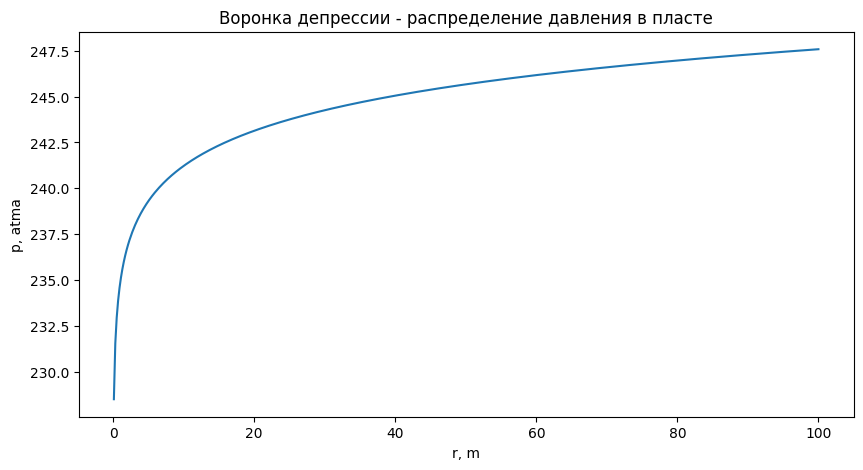

In [3]:
# формируем массив расстояний для которых будем проводить расчет
r_arr = np.linspace(0.1, 100, 500) 

# рассчитываем массив давлений на соответствующих расстояниях
# для расчета используется векторный расчет numpy - нет необходимости делать цикл в явном виде
# для примера показана передача всех аргументов созданной функции
p_arr = p_ss_atma(p_res_atma = 250,
                  q_liq_sm3day = 50,
                  mu_cP = 1,
                  B_m3m3 = 1.2,
                  k_mD = 40,
                  h_m = 10,
                  r_e_m = 240,
                  r_m = r_arr)

# настраиваем отображение графика
plt.rcParams["figure.figsize"] = (10,5)  # регулируем размер графика
# рисуем
plt.plot(r_arr, p_arr)   # команда отрисовки графика по заданным массивам
# настраиваем график
plt.title('Воронка депрессии - распределение давления в пласте')
plt.xlabel('r, m')
plt.ylabel('p, atma')
plt.show()

# 3. Построение карты давлений с использованием **matplotlib** <a class="anchor" id="3"></a>
Построим карту пластовых давлений с использованием формулы Дюпюи. 

Для построения карты полезно вспомнить, что расстояние от скважины с координатами $(x_{well}, y_{well})$ до произвольной точки пласта с координатами $(x,y)$ можно найти по формуле 
$$r=\sqrt{ (x-x_{well})^2 + (y-y_{well})^2 }
\tag{4}$$

простой вариант расчета  - можно создать пустую матрицу со значениями давления по сетке и перебирая все точки на сетке/матрице рассчитать давления

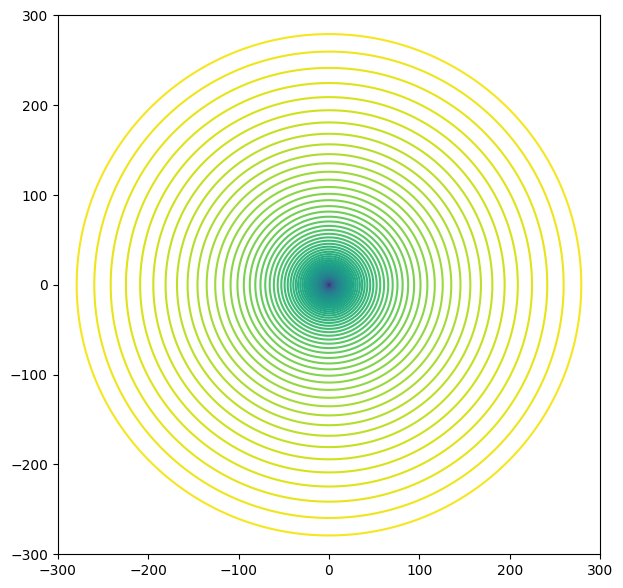

In [4]:
# зададим параметры воронки депрессии
pres = 250 
r_e = 300

# зададим координаты скважины
xwell1 = 0
ywell1 = 0

# зададим координатную сетку основываясь на параметрах
x = np.linspace(-r_e, r_e, 500)
y = np.linspace(-r_e, r_e, 500)

# создадим пустую матрицу значений
p_grid = np.zeros((500,500))

# перебираем в цикле все элементы матрицы и рассчитываем давления
for i in range(len(x)):          # пример 1 как получить индексы из списка
    for j,val in enumerate(y):   # пример 2 как получить индексы из списка
        # рассчитываем давления подставляя расстояния
        p_grid[i,j] = p_ss_atma(p_res_atma = 250,
                                q_liq_sm3day = 50,
                                mu_cP = 1,
                                B_m3m3 = 1.2,
                                k_mD = 40,
                                h_m = 10,
                                r_e_m = r_e,
                                r_m = ((x[i]-xwell1)**2 + (y[j]-ywell1)**2)**0.5
                                )
# Удалим из сетки все элементы где давление больше пластового
p_grid = np.where(p_grid>250,250,p_grid)

# построим отображение в виде контурной карты
plt.rcParams["figure.figsize"] = (7,7)
plt.contour(x, y, p_grid, levels=100)
plt.show()

Для ускорения и оптимизации расчета можно для расчета матрицы давлений использовать векторные возможности пакета numpy.
Для построения карты необходимо рассчитать значения давления на регулярной сетке, что можно сделать с использованием функции `np.meshgrid`

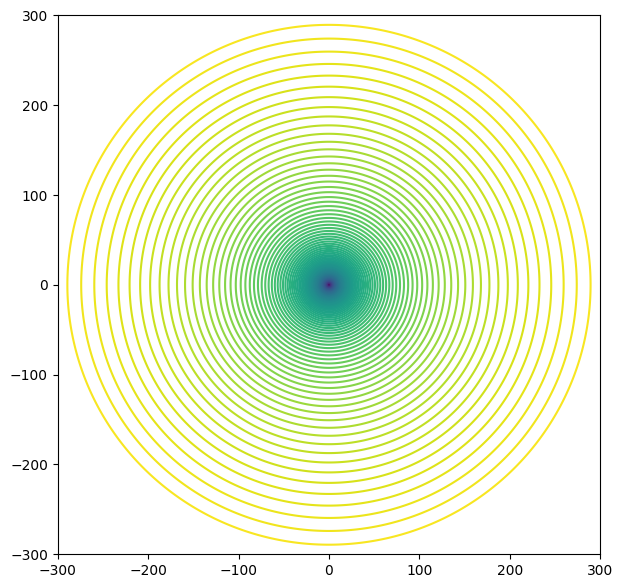

In [5]:
# зададим параметры воронки депрессии
pres = 250 
r_e = 300

# зададим координатную сетку основываясь на параметрах
x = np.linspace(-r_e, r_e, 300)
y = np.linspace(-r_e, r_e, 300)
# рассчитаем вспомогательные вектора для построения сетки
xv, yv = np.meshgrid(x, y)
# зададим координаты скважины
xwell1 = 0
ywell1 = 0
# рассчитаем значение давлений во всех точках сетки
# расчет ведется для матрицы координата с использованием векторных возможностей numpy
p_mesh = p_ss_atma(r_m=((xv-xwell1)**2 + (yv-ywell1)**2)**0.5, p_res_atma=pres, r_e_m=r_e)
# удалим значения за контуром, так как в данном случае они не имеют смысла
p_mesh[np.where(p_mesh > pres)] = pres
# построим отображение в виде контурной карты
plt.rcParams["figure.figsize"] = (7,7)
plt.contour(x, y, p_mesh, levels=100)
plt.show()

Интересно отметить, что для стационарного решения работает принцип суперпозиции - сумма двух решений также будет решением, это позволяет построить карту для нескольких скважин.
Давление в любой точке пласта можно найти по формуле

$$P_{res} - P_{x,y} =  \sum_{i} 18.41\dfrac{ Q_i\mu B }{kh} \left[ \ln\dfrac{r_e}{\sqrt{ (x-x_{w.i})^2 + (y-y_{w.i})^2 }} +S \right]
\tag{5}$$

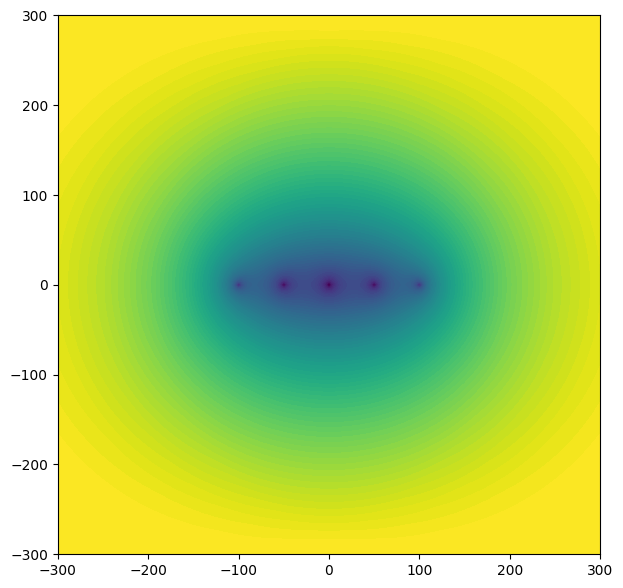

In [6]:
# зададим параметры воронки депрессии
pres = 250 
r_e = 300

# зададим координатную сетку основываясь на параметрах
x = np.linspace(-r_e, r_e, 300)
y = np.linspace(-r_e, r_e, 300)
# рассчитаем вспомогательные вектора для построения сетки
xv, yv = np.meshgrid(x, y)

# зададим координаты скважины (всего будет 5 скважин у которых меняется только х координата)
xwell = [-100, -50, 0 , 50, 100]
ywell = 0

# зададим пустой список матриц с перепадами давлений от каждой отдельной скважины
p_mesh_i=[]

# для каждой скважины найдем ее влияние на давления
for xi in xwell:
    # рассчитаем матрицу расстояний от элементов сетки до скважины i
    r_well = ((xv-xi)**2 + (yv-ywell)**2)**0.5
    # рассчитаем значение давлений во всех точках сетки для скважины i
    p_mesh_i_ = p_ss_atma(r_m=r_well, p_res_atma=pres, r_e_m=r_e)
    # удалим значения за контуром, так как в данном случае они не имеют смысла
    p_mesh_i_[np.where(p_mesh_i_ > pres)] = pres
    # сохраним влияние скважины i в списке матриц влияния отдельных скважин
    p_mesh_i.append(p_mesh_i_)
    
# найдем суммарное влияние все скважин
p_mesh_sum = 0
for p_mesh_i_ in p_mesh_i:
    # найдем сумму решений, помним что суммировать можно депрессии
    p_mesh_sum = pres - p_mesh_i_ + p_mesh_sum
p_mesh_sum = pres -  p_mesh_sum

# построим отображение в виде контурной карты
plt.rcParams["figure.figsize"] = (7,7)
plt.contourf(x, y, p_mesh_sum, levels=100)
plt.show()

# 4 Задания для самостоятельной работы <a class="anchor" id="4"></a>

Для совершенствования навыков работы с python выполните следующие задания:

1. Постройте график распределения давления в пласте для композитного пласта. В композитном пласте на расстоянии $r<r_1$ проницаемость равна $k=k_1$, а для $r>=r_1$, $k=k_2$. 
2. Постройте двумерную тепловую карту распределения давления в пласте для моделей однородного пласта и композитного пласта. 
3. Рассчитайте среднюю величину давления в круговой области дренирования для однородного пласта. Насколько среднее давление в круговой области дренирования будет отличаться от давления на контуре. Чему будет равен коэффициент $S$ в выражении  $Q=\dfrac{kh}{18.41\mu B} \dfrac{P_{res}-P_{wf}}{ln(\dfrac{r_e}{r_w})+S}$ при использовании вместо давления на контуре среднего давления? Постройте график, на котором будет отображаться распределение давления в зоне дренирования и величина среднего давления (в виде линии).
4. Для примера с несколькими скважинами имитирующими трещину ГРП рассчитайте дебиты скважин таким образом, чтобы забойное давление на всех скважинах было одинаковым. Постройте графики распределения давления в пласте. Постройте график дебитов вдоль "скважины".